In [1]:
import pandas as pd
import numpy as np

import torch
import torch.nn.functional as F
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix
import matplotlib.pyplot as plt

from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.utils import check_random_state
from sklearn.manifold import TSNE

In [2]:
preds = np.load("predictions.npy")
ground_truths = np.load("ground_truths.npy")

In [3]:
preds.shape

(1656,)

In [4]:
ground_truths.shape

(1656,)

In [5]:
# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(ground_truths, preds)

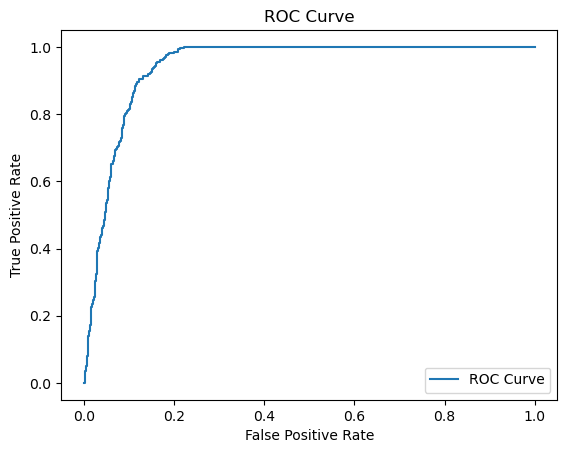

In [6]:
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


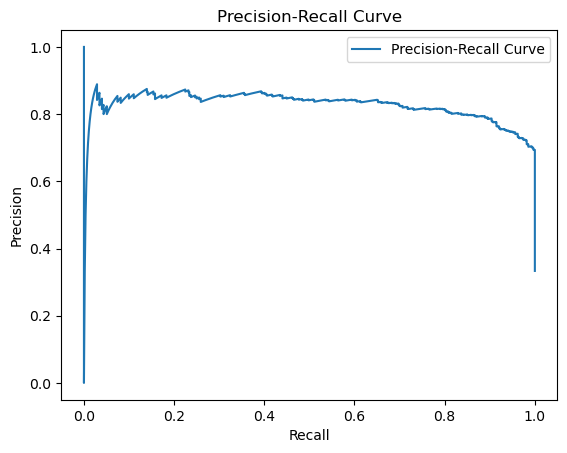

In [7]:
# Calculate precision-recall curve
precision, recall, thresholds_pr = precision_recall_curve(ground_truths, preds)

# Plot precision-recall curve
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()



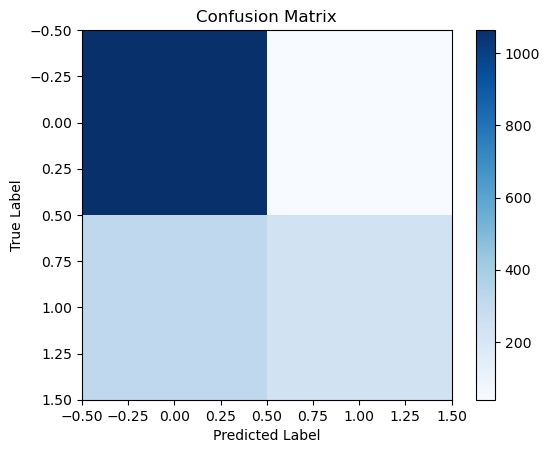

In [8]:
# Convert probabilities to binary predictions using a threshold
threshold = 0.5
binary_preds = (preds >= threshold).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(ground_truths, binary_preds)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 2. Plot the node embeddings

In [9]:
x_dict = torch.load('x_dict.pth')
len(x_dict['perturbation'])

5528

In [10]:
arrs = []

for k, v in x_dict.items():
    for i in range(len(v)):
        arrs.append(v[i].cpu().detach().numpy())
        
#for k, v in arrs.items():
    
arrays = np.vstack(arrs)
arrays.shape


(39959, 128)

In [11]:
embeddings_df = pd.DataFrame(arrays)
#df['label'] = 0
embeddings_df.shape

(39959, 128)

In [12]:
# Add labels to the embeddings dataframe
# Collect labels
entity = []
for k,v in x_dict.items():
   entity.append(k)

# Create a cumulative_index dictionary
cum_indx_dict = {}
seed = 0
for i in entity:
    seed += len(x_dict[i])
    cum_indx_dict[i] = seed

# Add laabels
indx_seed = 0
for k, v in cum_indx_dict.items():
    for i in range(indx_seed,int(v)):
        indx_seed = v
        embeddings_df.loc[i:indx_seed, 'label'] = k

In [17]:
# Initialize t-SNE model
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
embeddings_tsne = tsne.fit_transform(embeddings_df.iloc[:,:-1])


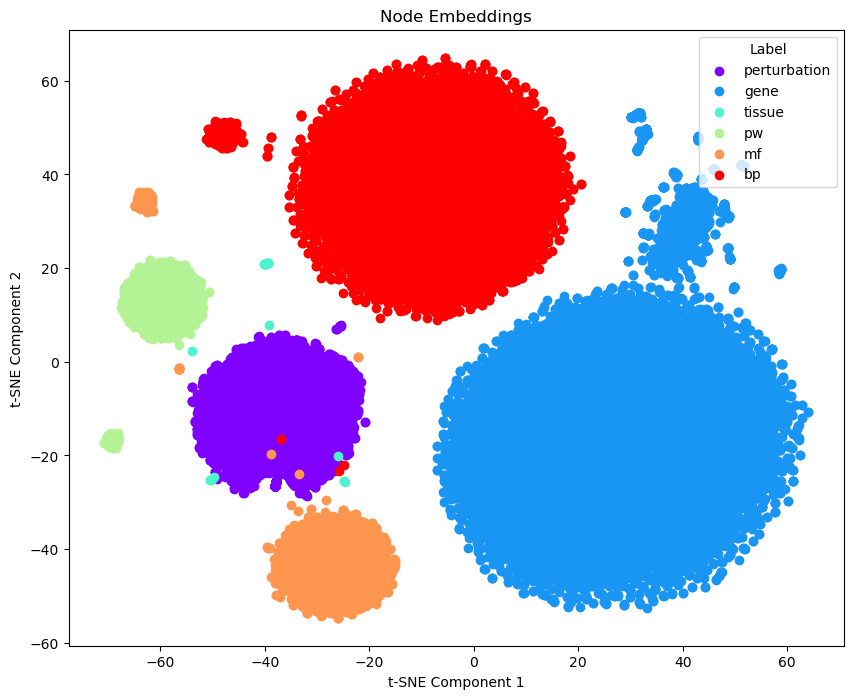

In [18]:
# Plot the embeddings
unique_labels = embeddings_df.iloc[:, -1].unique()
labels = embeddings_df.iloc[:, -1]
label_colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

# Plot the embeddings with label colors
plt.figure(figsize=(10, 8))
for i, label in enumerate(unique_labels):
    subset_indices = labels == label
    plt.scatter(embeddings_tsne[subset_indices, 0], embeddings_tsne[subset_indices, 1], label=label, color=label_colors[i])

plt.title('Node Embeddings')
plt.legend(title='Label', loc='upper right')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()